<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/mistral_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal LLM using Mistral `pixtral-large` for image reasoning

In this notebook, we show how to use MistralAI MultiModal LLM class/abstraction for image understanding/reasoning.

We demonstrate following functions that are supported for MistralAI Pixtral Multimodal LLM:
* `complete` (both sync and async): for a single prompt and list of images
* `stream complete` (both sync and async): for steaming output of complete

In [ ]:
%pip install llama-index-multi-modal-llms-mistralai
%pip install matplotlib

In [ ]:
import os
from IPython.display import Markdown, display

os.environ[
    "MISTRAL_API_KEY"
] = "<YOUR API KEY>"  # Your MistralAI API token here

## Initialize `MistralAIMultiModal`

## 

In [ ]:
from llama_index.multi_modal_llms.mistralai import MistralAIMultiModal

mistralai_mm_llm = MistralAIMultiModal(
    model="pixtral-large-latest", max_new_tokens=1000
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ravithejad/Desktop/llamaindex/lib/python3.9/sit
[nltk_data]     e-packages/llama_index/core/_static/nltk_cache...
[nltk_data]   Package stopwords is already up-to-date!
/Users/ravithejad/Desktop/llamaindex/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Load Images from URLs

In [ ]:
from llama_index.core.multi_modal_llms.generic_utils import load_image_urls


image_urls = [
    "https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg",
    "https://cdn.statcdn.com/Infographic/images/normal/30322.jpeg",
]

image_documents = load_image_urls(image_urls)

### First Image

https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg


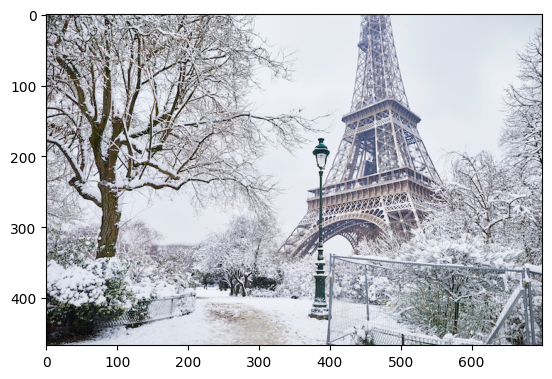

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}
img_response = requests.get(image_urls[0], headers=headers)

print(image_urls[0])

img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Second Image

https://cdn.statcdn.com/Infographic/images/normal/30322.jpeg


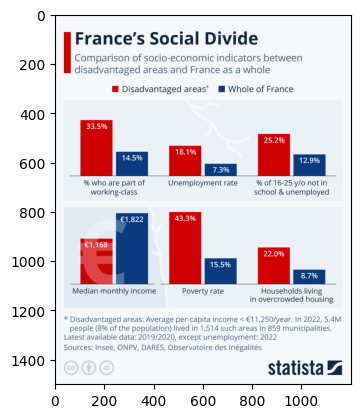

In [ ]:
img_response = requests.get(image_urls[1], headers=headers)

print(image_urls[1])

img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Complete a prompt with a bunch of images

In [ ]:
complete_response = mistralai_mm_llm.complete(
    prompt="Describe the images as an alternative text in a few words",
    image_documents=image_documents,
)

In [ ]:
display(Markdown(f"{complete_response}"))

The first image shows the Eiffel Tower in Paris covered in snow, with trees and a pathway also blanketed in white.

The second image is an infographic titled "France's Social Divide," comparing socio-economic indicators between disadvantaged areas and the whole of France. Key points include:
- 33.5% of people in disadvantaged areas are part of the working class, compared to 14.5% in the whole of France.
- The unemployment rate is 18.1% in disadvantaged areas versus 7.3% nationally.
- 25.2% of 16-25 year-olds in disadvantaged areas are not in school and unemployed, compared to 12.9% nationally.
- The median monthly income is €1,168 in disadvantaged areas, compared to €1,822 nationally.
- The poverty rate is 43.3% in disadvantaged areas, compared to 15.5% nationally.
- 22.0% of households in disadvantaged areas live in overcrowded housing, compared to 8.7% nationally.

The data sources include Insee, ONPV, DARES, and Observatoire des Inégalités, with the latest available data from 2

### Steam Complete a prompt with a bunch of images

In [ ]:
stream_complete_response = mistralai_mm_llm.stream_complete(
    prompt="give me more context for this images in a few words",
    image_documents=image_documents,
)

In [ ]:
for r in stream_complete_response:
    print(r.delta, end="")

The images highlight the socio-economic disparities in France, particularly between disadvantaged areas and the country as a whole. The first image shows the Eiffel Tower in a snowy landscape, symbolizing France. The second image is an infographic comparing various socio-economic indicators between disadvantaged areas and the entire nation. Key points include:

1. **Working-Class Participation**: Only 33.5% of people in disadvantaged areas are part of the working class, compared to 45.5% nationally.
2. **Unemployment Rate**: The unemployment rate in disadvantaged areas is significantly higher at 18.1%, compared to 7.3% nationally.
3. **Youth Not in School or Employed**: 25.2% of youth aged 16-25 in disadvantaged areas are neither in school nor employed, compared to 12.9% nationally.
4. **Median Monthly Income**: The median monthly income in disadvantaged areas is €1,168, much lower than the national median of €1,822.
5. **Poverty Rate**: The poverty rate in disadvantaged areas is 43.3%

### Async Complete

In [ ]:
response_acomplete = await mistralai_mm_llm.acomplete(
    prompt="Describe the images as an alternative text in a few words",
    image_documents=image_documents,
)

In [ ]:
display(Markdown(f"{response_acomplete}"))

The first image shows the Eiffel Tower in Paris, France, covered in snow with trees and a pathway also blanketed in white.

The second image is an infographic titled "France's Social Divide," comparing socio-economic indicators between disadvantaged areas and the whole of France. Key points include:
- Percentage of people part of the working class: 33.5% in disadvantaged areas vs. 14.5% in the whole of France.
- Unemployment rate: 18.1% in disadvantaged areas vs. 7.3% in the whole of France.
- Percentage of 16-25 year-olds not in school and unemployed: 25.2% in disadvantaged areas vs. 12.9% in the whole of France.
- Median monthly income: €1,168 in disadvantaged areas vs. €1,822 in the whole of France.
- Poverty rate: 43.3% in disadvantaged areas vs. 15.5% in the whole of France.
- Households living in overcrowded housing: 22.0% in disadvantaged areas vs. 8.7% in the whole of France.

The data is sourced from Insee, ONPV

### Async Steam Complete

In [ ]:
response_astream_complete = await mistralai_mm_llm.astream_complete(
    prompt="Describe the images as an alternative text in a few words",
    image_documents=image_documents,
)

In [ ]:
async for delta in response_astream_complete:
    print(delta.delta, end="")

The first image shows the Eiffel Tower in Paris, France, covered in snow with trees and a pathway also covered in snow.

The second image is an infographic titled "France's Social Divide," comparing socio-economic indicators between disadvantaged areas and France as a whole. Key points include:
- 33.5% of people in disadvantaged areas are part of the working class, compared to 14.5% in the whole of France.
- The unemployment rate is 18.1% in disadvantaged areas versus 7.3% in the whole of France.
- 25.2% of 16-25 year-olds in disadvantaged areas are not in school and unemployed, compared to 12.9% in the whole of France.
- The median monthly income is €1,168 in disadvantaged areas and €1,822 in the whole of France.
- The poverty rate is 43.3% in disadvantaged areas and 15.5% in the whole of France.
- 22.0% of households in disadvantaged areas live in overcrowded housing, compared to 8.7% in the whole of France.

The data sources include Insee, ONPV, DARES, and Observatoire des In

## Complete with Two images

In [ ]:
image_urls = [
    "https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg",
    "https://assets.visitorscoverage.com/production/wp-content/uploads/2024/04/AdobeStock_626542468-min-1024x683.jpeg",
]

### Lets Inspect the images.

### First Image

https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg


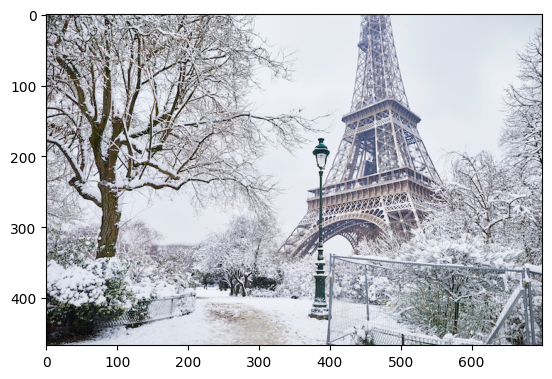

In [ ]:
img_response = requests.get(image_urls[0], headers=headers)

print(image_urls[0])

img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Second Image

https://assets.visitorscoverage.com/production/wp-content/uploads/2024/04/AdobeStock_626542468-min-1024x683.jpeg


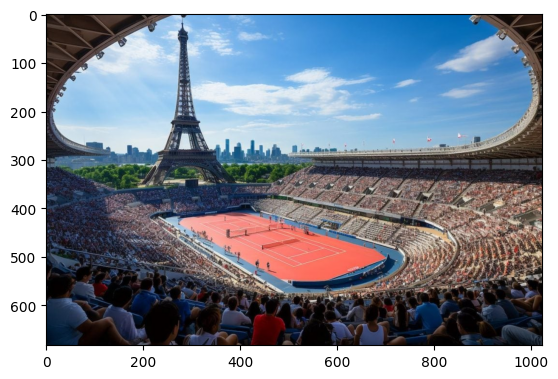

In [ ]:
img_response = requests.get(image_urls[1], headers=headers)

print(image_urls[1])

img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [ ]:
image_documents_compare = load_image_urls(image_urls)

response_multi = mistralai_mm_llm.complete(
    prompt="What are the differences between two images?",
    image_documents=image_documents_compare,
)

In [ ]:
display(Markdown(f"{response_multi}"))

The first image shows the Eiffel Tower in winter with snow on the ground and trees, while the second image shows a tennis court with a crowd of people watching a match. The first image has no people in it, while the second image has many people in it. The first image is taken during the day, while the second image is taken during the night. The first image has a park bench in it, while the second image has a tennis court in it. The first image has a fence in it, while the second image has a stadium in it.

##  Load Images from local files

In [ ]:
!wget 'https://www.boredpanda.com/blog/wp-content/uploads/2022/11/interesting-receipts-102-6364c8d181c6a__700.jpg' -O 'receipt.jpg'

--2024-11-18 21:51:11--  https://www.boredpanda.com/blog/wp-content/uploads/2022/11/interesting-receipts-102-6364c8d181c6a__700.jpg
Resolving www.boredpanda.com (www.boredpanda.com)... 18.161.111.92, 18.161.111.28, 18.161.111.66, ...
Connecting to www.boredpanda.com (www.boredpanda.com)|18.161.111.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112631 (110K) [image/jpeg]
Saving to: ‘receipt.jpg’

receipt.jpg         100%[===================>] 109.99K   450KB/s    in 0.2s    

2024-11-18 21:51:16 (450 KB/s) - ‘receipt.jpg’ saved [112631/112631]



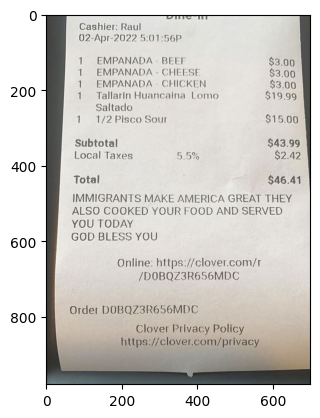

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("./receipt.jpg")
plt.imshow(img)

In [ ]:
from llama_index.core import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader(
    input_files=["./receipt.jpg"]
).load_data()

response = mistralai_mm_llm.complete(
    prompt="Transcribe the text in the image",
    image_documents=image_documents,
)

In [ ]:
display(Markdown(f"{response}"))

Sure, here is the transcription of the text in the image:

---

Dine-in

Cashier: Raul
02-Apr-2022 5:01:56P

1 EMPANADA - BEEF $3.00
1 EMPANADA - CHEESE $3.00
1 EMPANADA - CHICKEN $3.00
1 Tallarin Huancaina Lomo Saltado $19.99
1 1/2 Pisco Sour $15.00

Subtotal $43.99
Local Taxes 5.5% $2.42

Total $46.41

IMMIGRANTS MAKE AMERICA GREAT THEY ALSO COOKED YOUR FOOD AND SERVED YOU TODAY GOD BLESS YOU

Online: https://clover.com/r/D0BQZ3R656MDC

Order D0BQZ3R656MDC

Clover Privacy Policy
https://clover.com/privacy

---